In [2]:
#importing libraries 

import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')
from pandas import DatetimeIndex, Series, to_datetime
import seaborn as sns

## San Francisco Crime Part 1

### 1) Loading the Data

In [3]:
police = pd.read_csv('../Problem-Sets/data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
police

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,170106724,ASSAULT,BATTERY,Tuesday,02/07/2017,10:08,TENDERLOIN,NONE,TURK ST / HYDE ST,-122.415695,37.782585,"(37.78258519684673, -122.41569492213362)",17010672404134
2215020,170115747,ASSAULT,BATTERY,Friday,02/10/2017,10:28,MISSION,NONE,1600 Block of BRYANT ST,-122.410478,37.766246,"(37.76624632091369, -122.41047806948747)",17011574704134
2215021,170177565,ASSAULT,BATTERY,Wednesday,03/01/2017,00:01,SOUTHERN,NONE,MISSION ST / 4TH ST,-122.404270,37.784479,"(37.784478853874475, -122.40427017948574)",17017756504134
2215022,170183506,VEHICLE THEFT,STOLEN TRUCK,Friday,03/03/2017,20:30,PARK,NONE,1400 Block of GROVE ST,-122.440483,37.775553,"(37.77555290168326, -122.44048310699829)",17018350607025


In [4]:
police['Date'] = pd.to_datetime(police['Date'])

In [5]:
police

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,170106724,ASSAULT,BATTERY,Tuesday,2017-02-07,10:08,TENDERLOIN,NONE,TURK ST / HYDE ST,-122.415695,37.782585,"(37.78258519684673, -122.41569492213362)",17010672404134
2215020,170115747,ASSAULT,BATTERY,Friday,2017-02-10,10:28,MISSION,NONE,1600 Block of BRYANT ST,-122.410478,37.766246,"(37.76624632091369, -122.41047806948747)",17011574704134
2215021,170177565,ASSAULT,BATTERY,Wednesday,2017-03-01,00:01,SOUTHERN,NONE,MISSION ST / 4TH ST,-122.404270,37.784479,"(37.784478853874475, -122.40427017948574)",17017756504134
2215022,170183506,VEHICLE THEFT,STOLEN TRUCK,Friday,2017-03-03,20:30,PARK,NONE,1400 Block of GROVE ST,-122.440483,37.775553,"(37.77555290168326, -122.44048310699829)",17018350607025


### 2) Descriptive Statistics

#### 2.1 Plot the number of incidents per year from 2003-2018 (choose the appropriate type of plot). Have crime rates increased or decreased in general?

In [6]:
new_police = police[(police['Date'].dt.year >=2003) & (police['Date'].dt.year <= 2018)]


In [7]:
new_police['year'] = police['Date'].dt.year

In [8]:
police_by_year = new_police.groupby('year').count()
police_by_year['count'] = police_by_year['Location']
police_by_year

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,count
year,,,,,,,,,,,,,,
2003,149176,149176,149176,149176,149176,149176,149176,149176,149176,149176,149176,149176,149176,149176
2004,148148,148148,148148,148148,148148,148148,148148,148148,148148,148148,148148,148148,148148,148148
2005,142186,142186,142186,142186,142186,142186,142186,142186,142186,142186,142186,142186,142186,142186
2006,137853,137853,137853,137853,137853,137853,137853,137853,137853,137853,137853,137853,137853,137853
2007,137639,137639,137639,137639,137639,137639,137639,137639,137639,137639,137639,137639,137639,137639
2008,141311,141311,141311,141311,141311,141311,141311,141311,141311,141311,141311,141311,141311,141311
2009,139860,139860,139860,139860,139860,139860,139860,139860,139860,139860,139860,139860,139860,139860
2010,133523,133523,133523,133523,133523,133523,133523,133523,133523,133523,133523,133523,133523,133523
2011,132697,132697,132697,132697,132697,132697,132697,132697,132697,132697,132697,132697,132697,132697


Text(0.5, 1.0, 'Number of Incidents per Year')

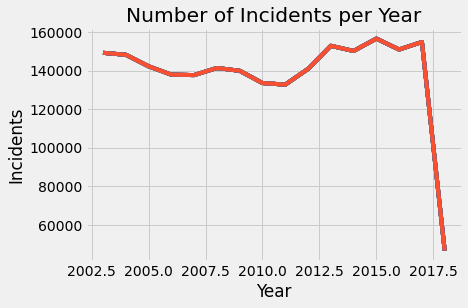

In [9]:
plot.plot(police_by_year)
plot.xlabel("Year")
plot.ylabel("Incidents")
plot.title("Number of Incidents per Year")

Based on the plot above, there has been major changes in incidents throughout the years. The number of incidents have their first major dip in 2011, but then we see a slight increase. Then there is a huge decrease from 2017 to 2018 where there is a drop in the number of incidents in that particular year.

#### 2.2 Check to see if these relationships change when looking at particular types of cime?

The different type of crime categories.

In [10]:
new_police['Category'].unique()

array(['NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'SECONDARY CODES',
       'VANDALISM', 'BURGLARY', 'LARCENY/THEFT', 'DRUG/NARCOTIC',
       'WARRANTS', 'VEHICLE THEFT', 'OTHER OFFENSES', 'WEAPON LAWS',
       'ARSON', 'MISSING PERSON', 'DRIVING UNDER THE INFLUENCE',
       'SUSPICIOUS OCC', 'RECOVERED VEHICLE', 'DRUNKENNESS', 'TRESPASS',
       'FRAUD', 'DISORDERLY CONDUCT', 'SEX OFFENSES, FORCIBLE',
       'FORGERY/COUNTERFEITING', 'KIDNAPPING', 'EMBEZZLEMENT',
       'STOLEN PROPERTY', 'LIQUOR LAWS', 'FAMILY OFFENSES', 'LOITERING',
       'BAD CHECKS', 'TREA', 'GAMBLING', 'RUNAWAY', 'BRIBERY',
       'PROSTITUTION', 'PORNOGRAPHY/OBSCENE MAT',
       'SEX OFFENSES, NON FORCIBLE', 'SUICIDE', 'EXTORTION'], dtype=object)

Here I am looking at the **'DRUG/NARCOTIC'** crime category.

Text(0.5, 1.0, "Number of 'Drug/Narcotic' Incidents per Year")

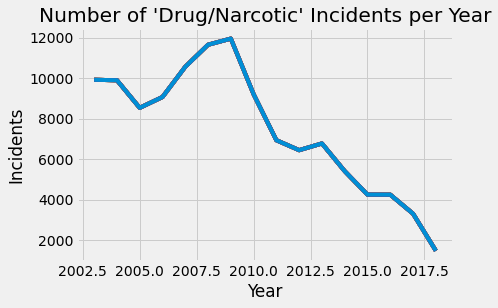

In [11]:
plot.plot(new_police[new_police['Category'] == 'DRUG/NARCOTIC'].groupby('year').count())
plot.xlabel("Year")
plot.ylabel("Incidents")
plot.title("Number of 'Drug/Narcotic' Incidents per Year")

When looking at the plot specifically for the drug/narcotic crime categoy we can see that there is a an overall decreaseing trend. Between the years 2006-2009 there is an increase in the number of incidents, but then changes over the next year. There seems to be a steady decrease in the number of drug/narcotic incidents in San Francisco that in 2017 the number of reported incidents reached its all time low since 2003.

Note we can't be certain if 2018 was actually lower than 2017 since we only have information up untill May of 2018.

Below, I am looking at the **'ASSAULT'** category.

Text(0.5, 1.0, "Number of 'Assault' Incidents per Year")

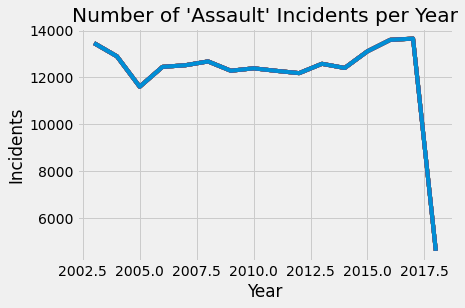

In [12]:
plot.plot(new_police[new_police['Category'] == 'ASSAULT'].groupby('year').count())
plot.xlabel("Year")
plot.ylabel("Incidents")
plot.title("Number of 'Assault' Incidents per Year")

From this plot, there is a steady number of reported of incidents for assault. There aren't
many drastic changes until the years 2017 and 2018, where there is a drastic drop in the number of assaults in San Francisco.



Below, I am looking at the **'DRIVING UNDER THE INFLUENCE'** category.

Text(0.5, 1.0, "Number of 'Driving Under the Influence' Incidents per Year")

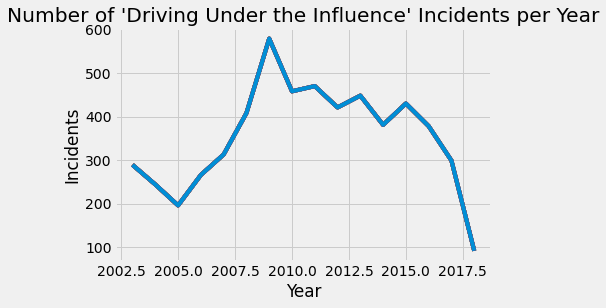

In [13]:
plot.plot(new_police[new_police['Category'] == 'DRIVING UNDER THE INFLUENCE'].groupby('year').count())
plot.xlabel("Year")
plot.ylabel("Incidents")
plot.title("Number of 'Driving Under the Influence' Incidents per Year")

Looking at this plot, we see that the number of reported incidents for driving under the influence have steadily increased in 2005-2009. Then this changes as there is a drop 
in the number of incidents, but fluctuates as some years there is an increase followed by a decrease in incidents. After the year 2014 there has been a steady drop in incidents.


Overall, the number of crime incidents change depending in the specific category. 


#### 2.3 Looking at just 2018, what proportions of the total does each type of crime constituate? 

In [14]:
prop_crime = new_police.groupby('Category').count()
prop_crime.drop(prop_crime.columns[1:14], axis = 1, inplace = True)
prop_crime.rename(index=str, columns = {'IncidntNum':'Count'}, inplace=True)
prop_crime


,Count
Category,
ARSON,3931
ASSAULT,194694
BAD CHECKS,925
BRIBERY,813
BURGLARY,91543
DISORDERLY CONDUCT,10040
DRIVING UNDER THE INFLUENCE,5672
DRUG/NARCOTIC,119628
DRUNKENNESS,9826


Text(0.5, 1.0, 'Accidents per Category')

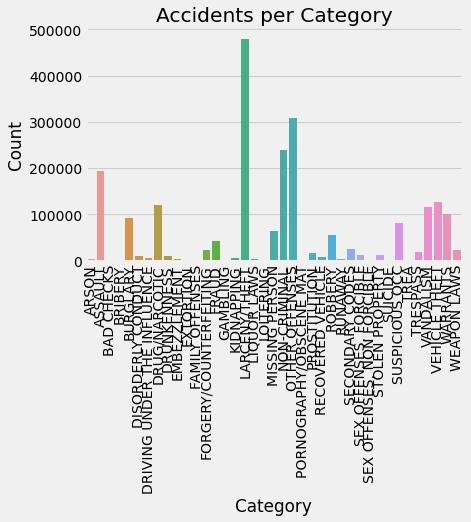

In [15]:
g = sns.barplot(x=prop_crime.index, y="Count", data=prop_crime)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("Accidents per Category")

From the bar plot we see that the categories that have the highest number
of incidents are larceny/theft, non-criminal, and other offenses.

#### 2.4 Is there a relationship between day of week, time, and whether an incident occurs?

In [16]:
day_of = new_police.groupby('DayOfWeek').count()
day_of = day_of.reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])


Text(0.5, 1.0, 'Number of Incidents per Day of the Week')

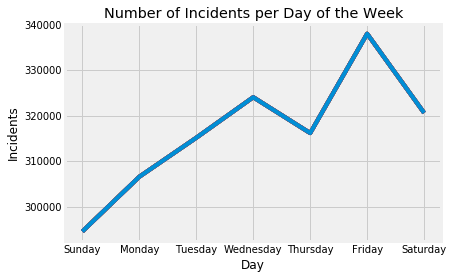

In [62]:
plot.plot(day_of)
plot.xlabel("Day")
plot.ylabel("Incidents")
plot.title("Number of Incidents per Day of the Week")

Looking at the plot above this represents the relationship between the day of the week and whether an incident occured. We can see that during the beginning of the week (Sunday and Monday) we have the least number of incidents, but as the week progresses that number increased. There is a drop in the number of incidents on Thursday, but then there is a peak at Friday indicating that there is an increase of incidents on that day of the week.

In [24]:
new_police

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,2015
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,2015
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,2015
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200,2015
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,2015
5,150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,2015-02-01,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451782,37.787085,"(37.7870853907529, -122.451781767894)",15009823251041,2015
6,150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,2015-01-31,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",15009824815200,2015
7,150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,2015-01-31,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203,"(37.729203356539, -122.374019331833)",15009824828150,2015
8,150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,2015-01-31,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809,"(37.7878092959561, -122.40656817787)",15009825405053,2015
9,150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,2015-01-31,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295,37.786258,"(37.7862578545865, -122.417295322526)",15009826006362,2015


In [25]:
new_police['Time'] = pd.to_datetime(new_police['Time'])


In [26]:
new_police['Hour'] = new_police['Time'].dt.hour

In [27]:
time_of = new_police.groupby('Hour').count()
time_of = time_of.reindex(index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
time_of


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,year
Hour,,,,,,,,,,,,,,
0,113096,113096,113096,113096,113096,113096,113096,113096,113096,113096,113096,113096,113096,113096
1,65182,65182,65182,65182,65182,65182,65182,65182,65182,65182,65182,65182,65182,65182
2,54550,54550,54550,54550,54550,54550,54550,54550,54550,54550,54550,54550,54550,54550
3,35596,35596,35596,35596,35596,35596,35596,35596,35596,35596,35596,35596,35596,35596
4,25285,25285,25285,25285,25285,25285,25285,25285,25285,25285,25285,25285,25285,25285
5,22413,22413,22413,22413,22413,22413,22413,22413,22413,22413,22413,22413,22413,22413
6,33494,33494,33494,33494,33494,33494,33494,33494,33494,33494,33494,33494,33494,33494
7,55551,55551,55551,55551,55551,55551,55551,55551,55551,55551,55551,55551,55551,55551
8,82459,82459,82459,82459,82459,82459,82459,82459,82459,82459,82459,82459,82459,82459


Text(0.5, 1.0, 'Number of Incidents per Hour of the Day')

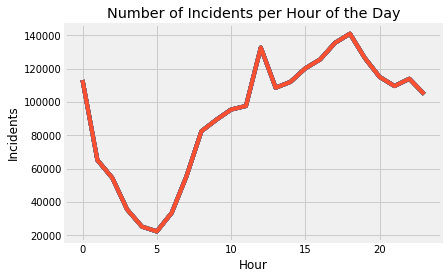

In [60]:
plot.plot(time_of)
plot.xlabel("Hour")
plot.ylabel("Incidents")
plot.title("Number of Incidents per Hour of the Day")

Looking at the time of day in the morning (5-11 am) there is a steady increase in the number of incidents. At noon there is a peak to indicate that there is a spike in incidents, which only continues to increase. From the plot it is clear that between evening hours we have the highest number of reported incidents which then decreases as we get into midnight. 

#### 2.5 Is there a relationship between day/time and particular types of accidents?

Below, I am looking at the **'DRUG/NARCOTIC'** crime category.

Text(0, 0.5, 'Incidents')

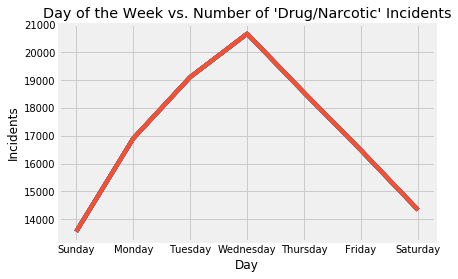

In [69]:
drugs = new_police[new_police['Category'] == 'DRUG/NARCOTIC'].groupby('DayOfWeek').count().reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plot.plot(drugs)
plot.title("Day of the Week vs. Number of 'Drug/Narcotic' Incidents")
plot.xlabel("Day")
plot.ylabel("Incidents")



Text(0, 0.5, 'Incidents')

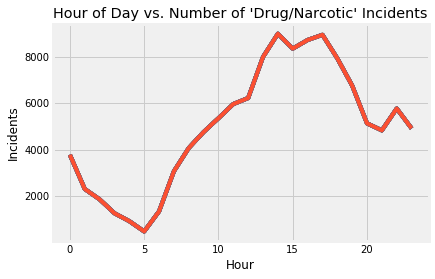

In [70]:
time_drug = new_police[new_police['Category'] == 'DRUG/NARCOTIC'].groupby('Hour').count().reindex(index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plot.plot(time_drug)
plot.title("Hour of Day vs. Number of 'Drug/Narcotic' Incidents")
plot.xlabel("Hour")
plot.ylabel("Incidents")


Here, I am looking at the **'ASSAULT'** category.

Text(0, 0.5, 'Incidents')

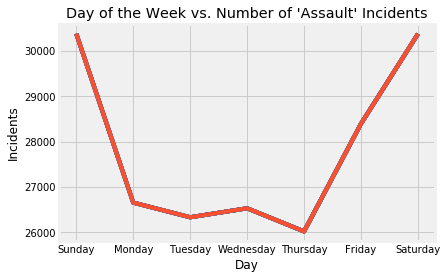

In [71]:
assault = new_police[new_police['Category'] == 'ASSAULT'].groupby('DayOfWeek').count().reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plot.plot(assault)
plot.title("Day of the Week vs. Number of 'Assault' Incidents")
plot.xlabel("Day")
plot.ylabel("Incidents")


Text(0, 0.5, 'Incidents')

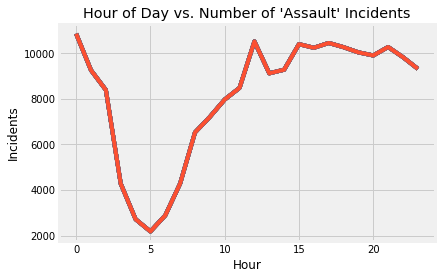

In [72]:
time_assault = new_police[new_police['Category'] == 'ASSAULT'].groupby('Hour').count().reindex(index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plot.plot(time_assault)
plot.title("Hour of Day vs. Number of 'Assault' Incidents")
plot.xlabel("Hour")
plot.ylabel("Incidents")

Here, I am looking at the **'DRIVING UNDER THE INFLUENCE'** category.

Text(0, 0.5, 'Incidents')

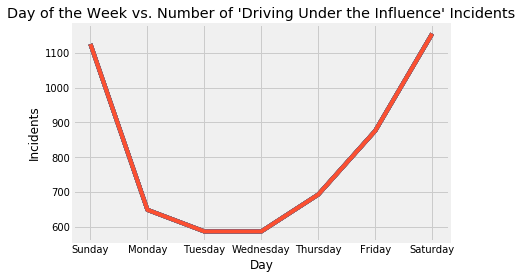

In [73]:
dui= new_police[new_police['Category'] == 'DRIVING UNDER THE INFLUENCE'].groupby('DayOfWeek').count().reindex(index = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plot.plot(dui)
plot.title("Day of the Week vs. Number of 'Driving Under the Influence' Incidents")
plot.xlabel("Day")
plot.ylabel("Incidents")


Text(0, 0.5, 'Incidents')

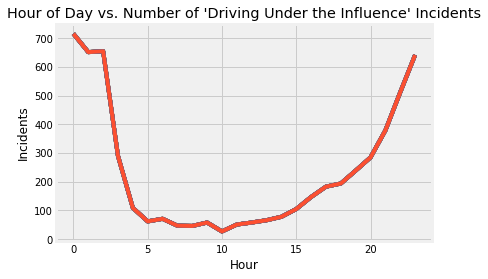

In [74]:
time_dui= new_police[new_police['Category'] == 'DRIVING UNDER THE INFLUENCE'].groupby('Hour').count().reindex(index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plot.plot(time_dui)
plot.title("Hour of Day vs. Number of 'Driving Under the Influence' Incidents")
plot.xlabel("Hour")
plot.ylabel("Incidents")

Looking at the three diffent categories drug/narcotic, assault, and driving under the influence there is a trend
in the number of incidents reported at different hours of the day. In the morning the number of incidents start to increase, but during the evening hours the highest number of incidents are reported. This is the trend we see in the plots, regardless of the category type.

On the other hand, when are specifically looking at the day of the week and the number of incidents reported the trend is different. For instance, drug/narcotic related incidents are the highest on Wednesday and decrease over the weekend. This is different for assault and driving under the influence since the number of incidents reported at the highest during the weekend instead during the week. 

#### 2.6 What neighborhoods experience the most crime? Do different neighborhoods experience different types of crime at different rates or  is the distribution of crime spatially consistent across neighborhoods?

Text(0.5, 1.0, 'Number of Incidents per SF Neighborhood')

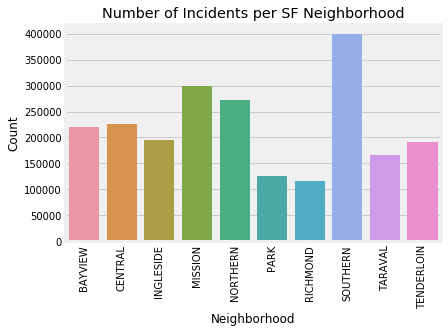

In [76]:
district = new_police.groupby('PdDistrict').count()
x  = sns.barplot(x=district.index, y="Descript", data=district)
x.set_xticklabels(x.get_xticklabels(), rotation=90)
x.set(xlabel='Neighborhood', ylabel='Count')
x.set_title("Number of Incidents per SF Neighborhood")

From the barplot, the neighborhood with the highest crime is Southern.

Text(0.5, 1.0, 'Number of Incidents per Crime in Southern')

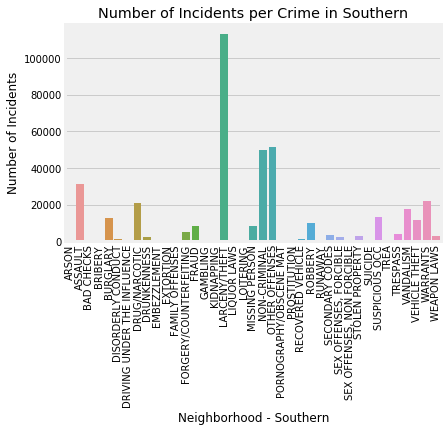

In [77]:
southern = new_police[(new_police['PdDistrict']=='SOUTHERN')]
south = southern.groupby('Category').count()

y  = sns.barplot(x=south.index, y="Descript", data=south)
y.set_xticklabels(y.get_xticklabels(), rotation=90)
y.set(xlabel='Neighborhood - Southern', ylabel='Number of Incidents')
y.set_title("Number of Incidents per Crime Type in Southern")

Text(0.5, 1.0, 'Number of Incidents per Crime Type in Mission')

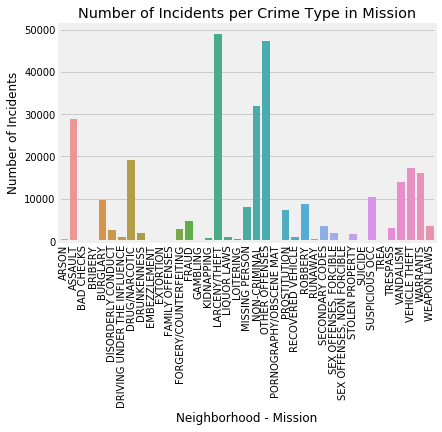

In [79]:
mission = new_police[(new_police['PdDistrict']=='MISSION')]
miss_ion = mission.groupby('Category').count()

z  = sns.barplot(x=miss_ion.index, y="Descript", data=miss_ion)
z.set_xticklabels(z.get_xticklabels(), rotation=90)
z.set(xlabel='Neighborhood - Mission', ylabel='Number of Incidents')
z.set_title("Number of Incidents per Crime Type in Mission")

Text(0.5, 1.0, 'Number of Incidents per Crime Type in Ingleside')

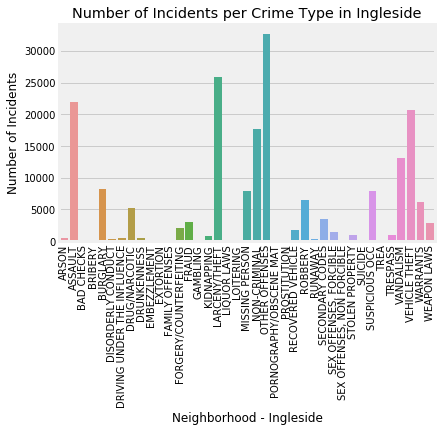

In [80]:
ingleside = new_police[(new_police['PdDistrict']=='INGLESIDE')]
ingle = ingleside.groupby('Category').count()

a  = sns.barplot(x=ingle.index, y="Descript", data=ingle)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set(xlabel='Neighborhood - Ingleside', ylabel='Number of Incidents')
a.set_title("Number of Incidents per Crime Type in Ingleside")

Text(0.5, 1.0, 'Number of Incidents per Crime Type in Taraval')

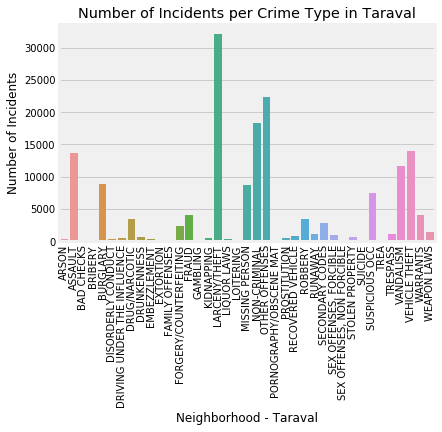

In [81]:
df = new_police[(new_police['PdDistrict']=='TARAVAL')].groupby('Category').count()



b = sns.barplot(x=df.index, y="Descript", data=df)
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set(xlabel='Neighborhood - Taraval', ylabel='Number of Incidents')
b.set_title("Number of Incidents per Crime Type in Taraval")

When looking at different neighborhoods some experience higher crime in certain categories. For instance, looking at the Ingleside neighborhood in San Francisco it has the highest number of assualt incidents in comparison to the Mission, Taraval, and Southern neighborhoods. Now looking at the larceny/theft category across Ingleside, Mission, Taraval, and Southern neighborhoods they all seeem to experience high rates of this particular type of crime. 

#### 2.7 Discuss two other intersting findings from your data

One the trend that I noticed when looking at different crime categories is that the number of incidents increase during similar time periods. In the assault, driving under the influecce, and drug/narcatic categories incidents increased during the years 2006-2009.

Another trend that I noticed, is that the number of non-criminal and other offenses incidents follow larceny/theft (highest number of incidents). This is true not only for all neighborhoods, but also when looking at specific neighborhoods.